<a href="https://colab.research.google.com/github/kmiyasararafath/ML_ZOOMCAMP/blob/main/ML_Zoom_Camp_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:

!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-04 05:26:50--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2021-10-04 05:26:50 (7.59 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [50]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [51]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [52]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [53]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [54]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [55]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [56]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [57]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


##Your code
What are the categorical variables? What are the numerical?

In [58]:
Categorical=['home','marital','records','job']
Numerical=['seniority','time','age','expenses','income','assets','debt','amount','price']

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1

In [59]:
df.isnull().sum()

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
default      0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)
print(len(df))
print(len(df_train))
print(len(df_val))
print(len(df_test))


4454
2672
891
891


In [61]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int64
dtype: object

Question 1

In [62]:
from sklearn.metrics import roc_auc_score
y_val=df_train['default']
auc=[]
for i,item in enumerate(Numerical):
  item_max=df_train[item].max()
  item_min=df_train[item].min()
  y_pred=(df_train[item]-item_min)/(item_max-item_min)
  auc.append(roc_auc_score(y_val, y_pred))

res = "\n".join("{} {}".format(x, y) for x, y in zip(Numerical, auc))
print(res)
  




seniority 0.2906221375508058
time 0.5608662489595051
age 0.4267066727500061
expenses 0.4990815782782989
income 0.31799333386736695
assets 0.35139574328771983
debt 0.49521703242164505
amount 0.5910773431595518
price 0.5043329862114843




Which numerical variable (among the following 4) has the highest AUC?

    seniority
    time
    income
    debt

time


#Training the model

From now on, use these columns only:

['seniority', 'income', 'assets', 'records', 'job', 'home']

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)



In [63]:
features=['seniority', 'income', 'assets', 'records', 'job', 'home']
from sklearn.feature_extraction import DictVectorizer

In [64]:
y_train=df_train['default']
y_test=df_test['default']
y_val=df_val['default']
del df_train['default']
del df_test['default']
del df_val['default']
train_dict=df_train[features].to_dict(orient='records')
test_dict=df_test[features].to_dict(orient='records')
val_dict=df_val[features].to_dict(orient='records')
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)
print(dv.get_feature_names())
X_train=dv.transform(train_dict)
X_test=dv.transform(test_dict)
X_val=dv.transform(val_dict)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

['assets', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'job=unk', 'records=no', 'records=yes', 'seniority']
(2672, 17)
(2672,)
(891, 17)
(891,)
(891, 17)
(891,)


In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict_proba(X_val)[:,1]
# y_pred

In [72]:
auc=0
auc=roc_auc_score(y_val,y_pred)
auc.round(3)

0.812


Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.512
    0.612
    0.712
    0.812

0.812


Question 3

Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them



In [73]:
precision=[]
recall=[]
threshold=np.linspace(0,1,101)
for t in threshold:
  actual_positive=(y_val==1)
  actual_negative=(y_val==0)
  predict_positive=(y_pred>=t)
  predict_negative=(y_pred<t)

  tp=(predict_positive & actual_positive).sum()
  fp=(predict_positive & actual_negative).sum()
  tn=(predict_negative & actual_negative).sum()
  fn=(predict_negative & actual_positive).sum()

  precision.append(tp/(tp+fp))
  recall.append(tp/(tp+fn))

print(precision)
print(recall)


[0.2760942760942761, 0.2792281498297389, 0.2847141190198366, 0.2898203592814371, 0.30062111801242236, 0.30407124681933845, 0.31241830065359477, 0.3203230148048452, 0.3296398891966759, 0.33905579399141633, 0.34558823529411764, 0.3531202435312024, 0.3656597774244833, 0.37976782752902155, 0.38813559322033897, 0.40353982300884955, 0.4106813996316759, 0.41825095057034223, 0.427734375, 0.43887775551102204, 0.4460580912863071, 0.4557235421166307, 0.4678492239467849, 0.47380410022779046, 0.4834123222748815, 0.49144254278728605, 0.49373433583959897, 0.5012987012987012, 0.5120643431635389, 0.5220994475138122, 0.5358166189111748, 0.5411764705882353, 0.5468277945619335, 0.55, 0.5602605863192183, 0.5637583892617449, 0.5694444444444444, 0.5770609318996416, 0.5783582089552238, 0.58203125, 0.5833333333333334, 0.5938864628820961, 0.5964125560538116, 0.5944700460829493, 0.6076555023923444, 0.6078431372549019, 0.6212121212121212, 0.625, 0.6310160427807486, 0.6388888888888888, 0.6404494382022472, 0.647058

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/p

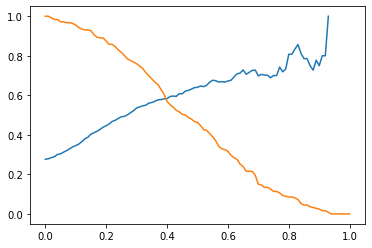

In [74]:
plt.plot(threshold,precision)
plt.plot(threshold,recall)

At which threshold precision and recall curves intersect?

    0.2
    0.4
    0.6
    0.8
0.4



Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:
$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01


In [75]:
f1=[]
for i in range(len(precision)):
  f1.append((2*precision[i]*recall[i])/(precision[i]+recall[i]))


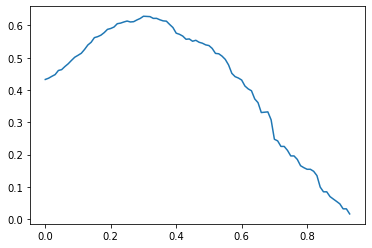

In [76]:
plt.plot(threshold,f1)



At which threshold F1 is maximal?

    0.1
    0.3
    0.5
    0.7

0.3


Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation



In [81]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model



In [82]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [88]:
from tqdm.auto import tqdm

In [90]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=1)

auc_score=[]
for train_index,val_index in tqdm(kfold.split(df_train_full)):
  df_train=df_train_full[features].iloc[train_index]
  df_val=df_train_full[features].iloc[val_index]
  y_train=df_train_full['default'].iloc[train_index]
  y_val=df_train_full['default'].iloc[val_index]

  dv,model=train(df_train,y_train,C=1.0)

  y_pred=predict(df_val,dv,model)
  auc_score.append(roc_auc_score(y_val,y_pred))

auc_score_mean=np.mean(auc_score)
auc_score_std=np.std(auc_score)


0it [00:00, ?it/s]

In [92]:
auc_score

[0.8256212256212256,
 0.8254077031563474,
 0.789298525308888,
 0.8153421373265731,
 0.8054696294614563]

In [91]:
print(auc_score_mean)
print(auc_score_std)

0.812227844174898
0.013669069470482898




How large is standard devidation of the scores across different folds?

    0.001
    0.014
    0.09
    0.14

0.014



Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.01, 0.1, 1, 10]
    Initialize KFold with the same parameters as previously
    Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)



In [94]:
C=[0.01, 0.1, 1, 10]
for c_val in tqdm(C):

  kfold=KFold(n_splits=5, shuffle=True, random_state=1)

  auc_score=[]
  for train_index,val_index in tqdm(kfold.split(df_train_full)):
    df_train=df_train_full[features].iloc[train_index]
    df_val=df_train_full[features].iloc[val_index]
    y_train=df_train_full['default'].iloc[train_index]
    y_val=df_train_full['default'].iloc[val_index]

    dv,model=train(df_train,y_train,C=1.0)

    y_pred=predict(df_val,dv,model)
    auc_score.append(roc_auc_score(y_val,y_pred))

  auc_score_mean=np.mean(auc_score)
  auc_score_std=np.std(auc_score)
  print(f'C: {c_val} : AUC Mean: {auc_score_mean.round(3)}  : AUC STD DEVIATION : {auc_score_std.round(3)}')

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C: 0.01 : AUC Mean: 0.812  : AUC STD DEVIATION : 0.014


0it [00:00, ?it/s]

C: 0.1 : AUC Mean: 0.812  : AUC STD DEVIATION : 0.014


0it [00:00, ?it/s]

C: 1 : AUC Mean: 0.812  : AUC STD DEVIATION : 0.014


0it [00:00, ?it/s]

C: 10 : AUC Mean: 0.812  : AUC STD DEVIATION : 0.014




Which C leads to the best mean score?

    0.01
    0.1
    1
    10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

0.01

In [65]:
# # for item in Numerical:
# item=Numerical[0]
# item_max=df_train[item].max()
# item_min=df_train[item].min()
# print(item_max)
# print(item_min)
# threshold=np.linspace(0,1,101)
#   # t=threshold[0]
#   # print(threshold)
#   y_val=df_train['default']
#   y_pred=(df_train[item]-item_min)/(item_max-item_min)
#   # print(y_val)
#   # print(y_pred)
#   actual_positive=(y_val==1)
#   actual_negative=(y_val==0)
#   predict_positive=(y_pred>=t)
#   predict_negative=(y_pred<t)
  
#   tp=(predict_positive & actual_positive).sum()
#   fp=(predict_positive & actual_negative).sum()
#   tn=(predict_negative & actual_negative).sum()
#   fn=(predict_negative & actual_positive).sum()

#   tpr(i)=fp/(tn+fp)
#   fpr(i)=tp/(fn+tp)
  